In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate
from scipy.integrate import quad
import camb
from scipy.optimize import brentq

%matplotlib inline

In [117]:
# for plots
import seaborn as sns
sns.set_style("ticks", {'axes.grid': True, 'grid.linestyle': '--'})
sns.set_context("poster")
sns.set_palette("Set2")

In [3]:
# cosmology
pars = camb.CAMBparams()

In [118]:
# planck 2015 TT+lowP+lensing
# https://www.aanda.org/articles/aa/full_html/2016/10/aa25830-15/aa25830-15.html
pars.set_cosmology(ombh2=0.02226, 
                   omch2=0.1186,
                   cosmomc_theta=1.04103/100,
                   H0 = None,
                   tau = 0.066)

pars.InitPower.set_params(ns=0.9677,
                          As=2.139e-9)

pars.set_matter_power(redshifts=[0])

#results
results = camb.get_results(pars)

In [5]:
# use these two lines to compare with Planck derived parameters (Table 4 of 2015 parameters
# paper)
# results.get_derived_params()
# results.get_sigma8()

In [122]:
# linear matter power spectrum
kmin = 0.001
kmax = 100.
# multiplicative factors to make sure the region between kmin and kmax is properly interpolated
kh, z, [pk] = results.get_matter_power_spectrum(minkh=kmin*0.99, maxkh=kmax*1.001,npoints=1000)
# creating a P(k) function by interpolating camb output
pk_func = interpolate.interp1d(kh,pk, kind='cubic')

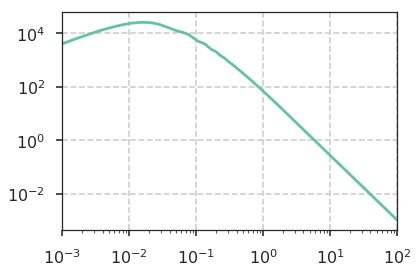

In [123]:
plt.loglog(kh, pk_func(kh))
plt.xlim(kmin,kmax)
plt.show()

In [169]:
# correlation function and its derivative given kmin, kmax and P(k)

# np.exp(-k**4) : smoothing kernel to regularize function for the transition k > 1

# correlation function
def xi(r,kmin=kmin,kmax=kmax,pk=pk_func):
    # sin is omitted in the integrand because its being weighted in quad
    int_ = lambda k: np.exp(-k**4) * k**2 * pk(k)/(2*(np.pi**2)*k*r)
    xir =  quad(int_,kmin, kmax,weight='sin', wvar=r)
    return xir[0]

xi = np.vectorize(xi)
# first derivative of correlation function
def xi_r(r,kmin=kmin,kmax=kmax,pk=pk_func):
    # sin and cos are omitted in the integrand because they're being weighted in quad
    int_a = lambda k: k**2 * np.exp(-k**4) * pk(k)/(2*(np.pi**2)*r)
    int_b = lambda k: -1*k**2 * np.exp(-k**4) * pk(k)/(2*(np.pi**2)*k*r**2)
    xi_r_a =  quad(int_a,kmin, kmax,weight='cos', wvar=r)
    xi_r_b =  quad(int_b,kmin, kmax,weight='sin', wvar=r)
    return xi_r_a[0]+xi_r_b[0]

xi_r = np.vectorize(xi_r)

In [203]:
# Linear point position given first derivative of correlation function
def get_lp(xi_r):
    dip = brentq(xi_r,82,90)
    peak = brentq(xi_r,97,105)
    return (dip+peak)/2

In [159]:
from scipy.misc import derivative

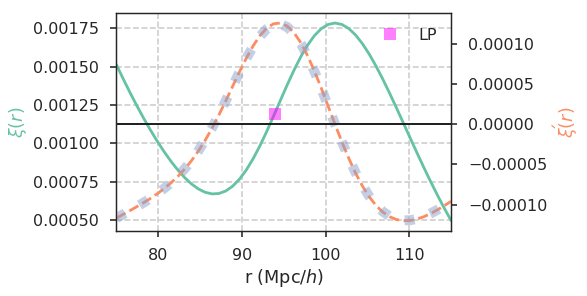

In [214]:
fig, ax1 = plt.subplots()

r = np.linspace(75,115,50)
### xi(r)
ax1.plot(r, xi(r))
ax1.set_xlim(r.min(),r.max())

ax1.set_ylabel(r'$\xi(r)$',color='C0')
ax1.set_xlabel(r'r (${\rm Mpc}/h$)')

### x'(r)
ax2 = ax1.twinx()
ax2.plot(r, xi_r(r),c='C1',ls='dashed')
ax2.plot(r, derivative(xi,r),c='C2',ls='dotted',lw=10,alpha=0.5)
ax2.axhline(y=0,color='k',lw=2)
ax2.set_ylabel(r'$\xi\'(r)$',color='C1')
ax2.grid()
# plt.savefig('Figures/xi_r.png', dpi=300, bbox_inches='tight',
#            facecolor='w', edgecolor='w')


# linear point
lp = get_lp(xi_r)
ax1.plot(lp,xi(lp),'s',color='magenta',alpha=0.5, label = 'LP')

ax1.legend()
plt.show()

In [213]:
# Getting LP straigh from Cosmology

In [ ]:
def lp_from_

In [204]:
get_lp(xi_r)

93.89821579819301

In [202]:
brentq(xi_r,97,105)

101.11255871864753